**Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.**

https://seaborn.pydata.org/

In [2]:
#Imports. Uncomment out first line if you get "module not found " error
#!pip install seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [4]:
#Loading a dataset from sklearn to use in this lesson.

data = load_boston()
features = data.data
target = data.target
columns = data.feature_names

df = pd.DataFrame(features, columns=columns)
df['MEDV'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**We'll use the dir() method to take a peek at the directory of seaborn to give us a idea of all the available plots that are available to us.**

In [11]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'external',
 'factorplot',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plotting_context',
 'poin

To quickly showcase what seaborn does for us we will create a simple scatter plot. First with seaborn then with matplotlib.

Text(0.5, 1.0, 'Matplotlib')

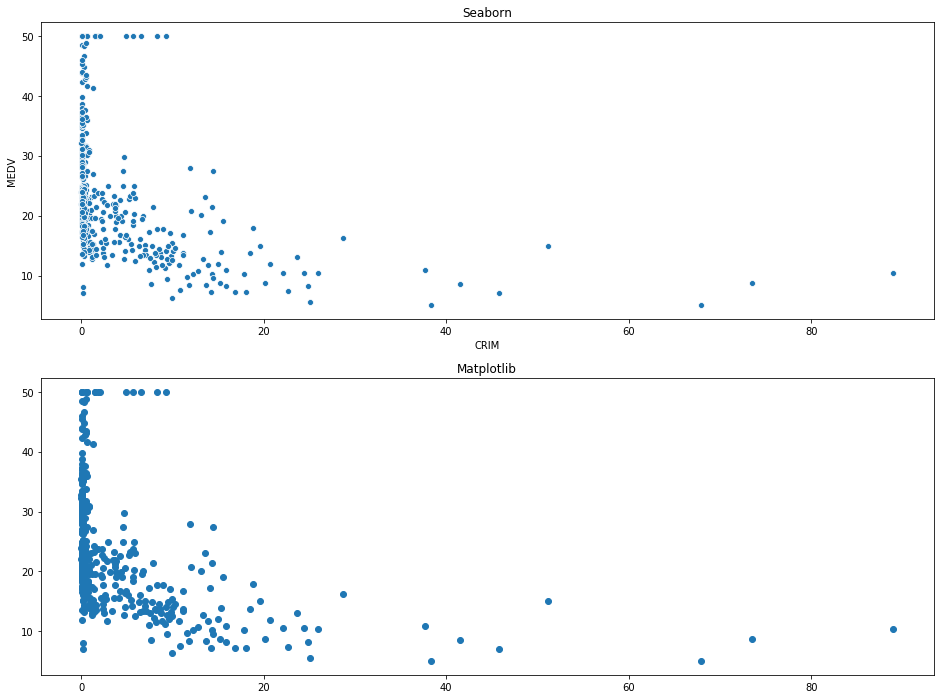

In [39]:
f, ax = plt.subplots(2, figsize=(16, 12))
#Seaborn
sns.scatterplot(data=df, x="CRIM", y="MEDV", ax=ax[0]).set_title("Seaborn")
#Matplotlib
ax[1].scatter(df["CRIM"], df["MEDV"])
ax[1].set_title("Matplotlib")

It looks like seaborn does quite a few extra things for us right out of the gate. First off we see that it automatically added axes labels (CRIM and MEDV). It also added a white edge color to encompass each circle representing our data points. It also appears to have reduced the size of each circle creating what I would argue is a much cleaner scatter. Also note that we are still working in concert with matplotlib as it is defined on the same matplotlib figure object. Let's see how else we can optimize this scatter plot.

# Adding a extra dimension of detail with hue

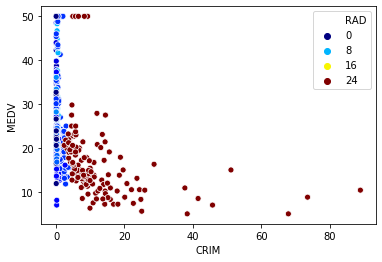

In [54]:
sns.scatterplot(data=df, x="CRIM", y="MEDV", hue="RAD", palette="magma")

Here we added a 3rd variable (RAD = radial distance to highways). We can quickly see that the homes closest to highways make up a large portion of the most valuable as well as least crime dwellings. In order to customize the color representation I added a additional argument "palette()" which you can provide one of seaborns pre designed color palettes. If you forget the name of these palettes seaborn provides a very handy error message which lists a majority of the colors available to you as I'll demonstrate below.

In [59]:
sns.scatterplot(data=df, x="CRIM", y="MEDV", hue="RAD", palette="Ihavenoidea")

ValueError: Palette {} not understood

# Charts Unique to Seaborn

Seaborn not only provides nice formatting but also has charts which are not found in matplotlib. I will go over a few of my favorites below.

# Heatmap

In [83]:
cor = df.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


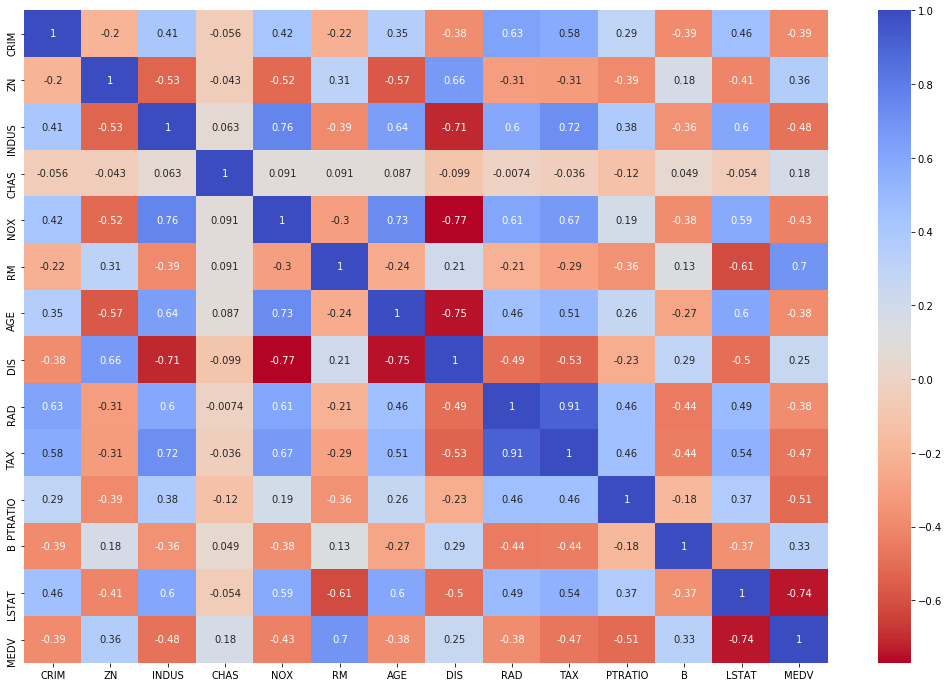

In [91]:
plt.figure(figsize=(18, 12))
sns.heatmap(cor, annot=True, cmap="coolwarm_r")

The heatmap allows you to quickly hone in on the highly correlated features. Notice the use of a diverting color scale which makes it easier to distinguish blue (strong positive correlation) and red (strong negative correlation). This chart might also prove useful on say a groupby object breaking down sum of sales in a particular region. 

# Violin Plots

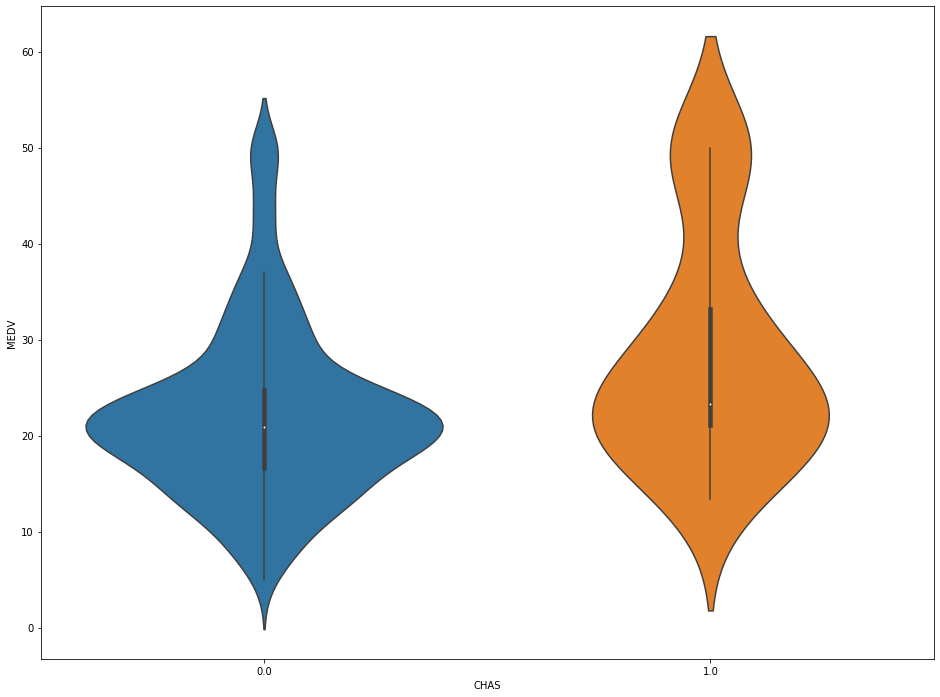

In [93]:
plt.figure(figsize=(16, 12))
sns.violinplot(data=df, x='CHAS', y="MEDV")

Here we are viewing the distribution of median home values for both properties located near the charles river or not near it. Violin plots are like a boxplot with the added bonus of being able to visualize the distribution of the data. Notice that the violins are widest at the median as to be expected as that is where the majority of our data lies. The orange violin is right skewed due to many high value homes that lie outside the inner quartile range as shown by the extending whisker passing 50 on the y-axis.

# Dist Plot

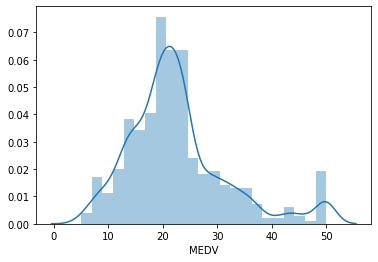

In [98]:
sns.distplot(df.MEDV)

Dist plot is a variant of the histogram which applies a nice curved representation of the overall distribution of the target feature.

# Regplot

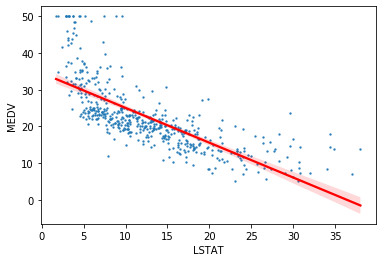

In [104]:
sns.regplot(data=df, x=df.LSTAT, y=df.MEDV, scatter_kws={"s": 2}, line_kws={"color": 'red'})

The regplot is one of my favorites included in seaborn. It fits a regression line which features a shaded band representing the confidence interval in a particular region. Notice the use scatter_kws and line_kws. This argument expects a dictionary which you then provide matplotlib specific settings. So anything you know you can alter within matplotlib such as alpha, s, c, etc... this is how you can alter them when working with seaborn. Here I reduced the circle size to 2 and adjusted the color of the regression line.

# Facet Grid

Often times we need to increase granularity on a specific feature we are analyzing and break it down into it's subcategories. For example, in our boston housing data we have 9 different categories of distance to highways. If we want to inspect the distribution of home values across each of these 9 sub categories the facet grid might be a great option.

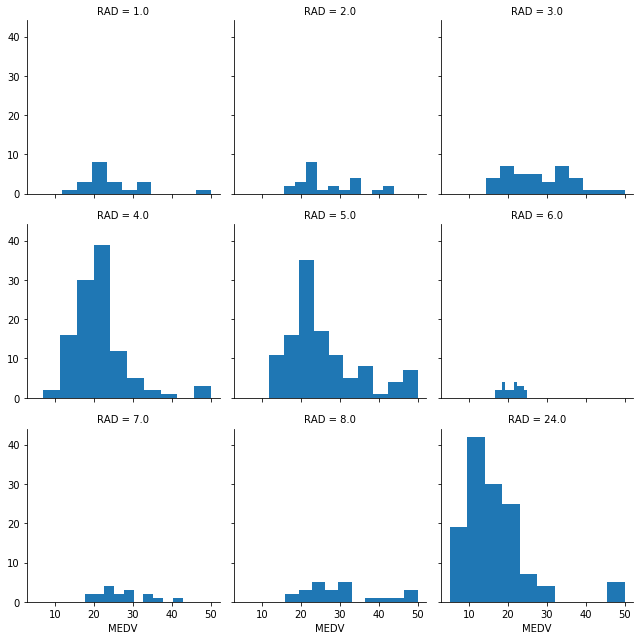

In [120]:
#First we define our grid. We are breaking it down by RAD (distance to highways) and specifying we want it displayed 3 columns wide
g = sns.FacetGrid(df, col='RAD', col_wrap=3)
#Now that we have defined our grid we tell it what we want to fill it with. In this case histograms depicting the distribution of house prices
g.map(plt.hist, "MEDV")

In the plot above I chose to fill our grid with matplotlib histograms. One for each of the 9 sub categories of the RAD column. Let's do another but this time use the seaborn distplot for a lil extra detail.

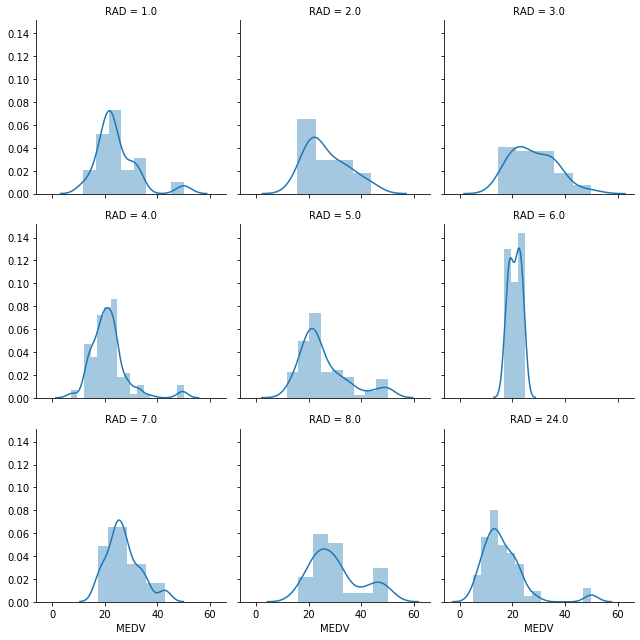

In [124]:
g = sns.FacetGrid(df, col='RAD', col_wrap=3)

g.map(sns.distplot, "MEDV")

Now let's try a scatter analyzing the relationship between crime and home values broken down by each sub category of distance to highway.

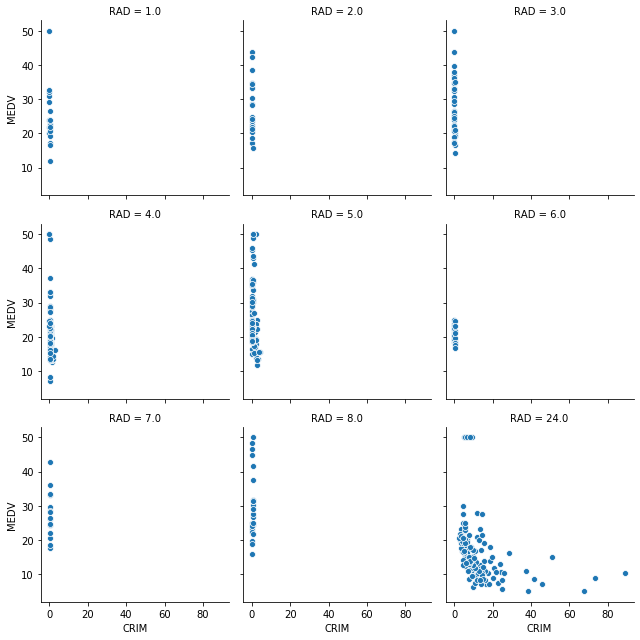

In [133]:
g = sns.FacetGrid(df, col='RAD', col_wrap=3)

g.map(sns.scatterplot, "CRIM", "MEDV")

Ok, this isn't very informative now is it. By default, the FacetGrid shares both the x and y axes as it's typically best when comparing several sub categories against eachother. In this case, it is hindering our ability to see those low crime areas in any level of useful detail. We can change this by making use of the sharey and sharex settings.

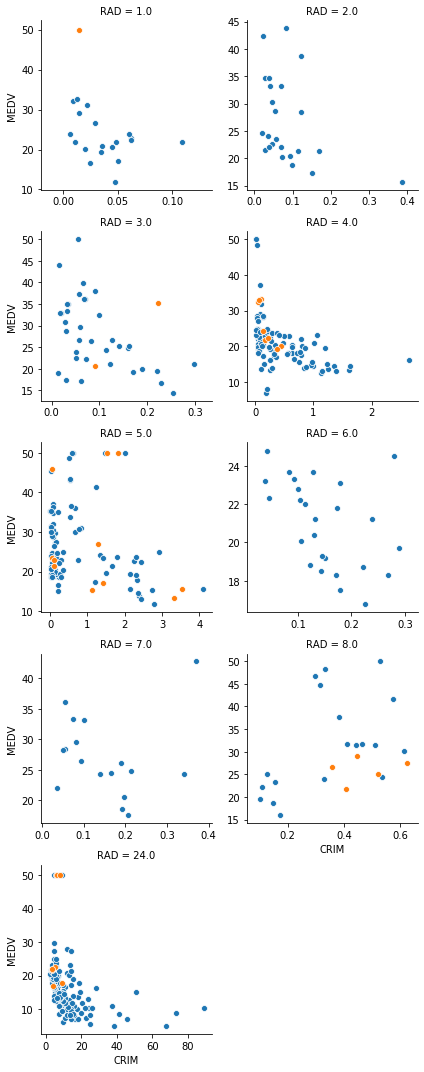

In [143]:
g = sns.FacetGrid(df, col='RAD', col_wrap=2, sharey = False, sharex= False, hue="CHAS")

g.map(sns.scatterplot, "CRIM", "MEDV")